In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df_original = pd.read_csv('../data/practica3/ejercicio3_practica3.csv')
df = df_original.copy()
df

,HorasEntrenamiento,TiempoPromedio_min
0,2,30.5
1,3,29.3
2,4,26.7
3,4,26.0
4,5,25.5
5,6,24.7
6,6,23.5
7,7,23.0
8,7,22.5
9,8,21.0


In [74]:
# Método 1: Usando pandas - matriz de correlación simple
correlation_matrix = df.corr()
correlation_matrix

,HorasEntrenamiento,TiempoPromedio_min
HorasEntrenamiento,1.000000,-0.959746
TiempoPromedio_min,-0.959746,1.000000


### Diagrama de dispersion

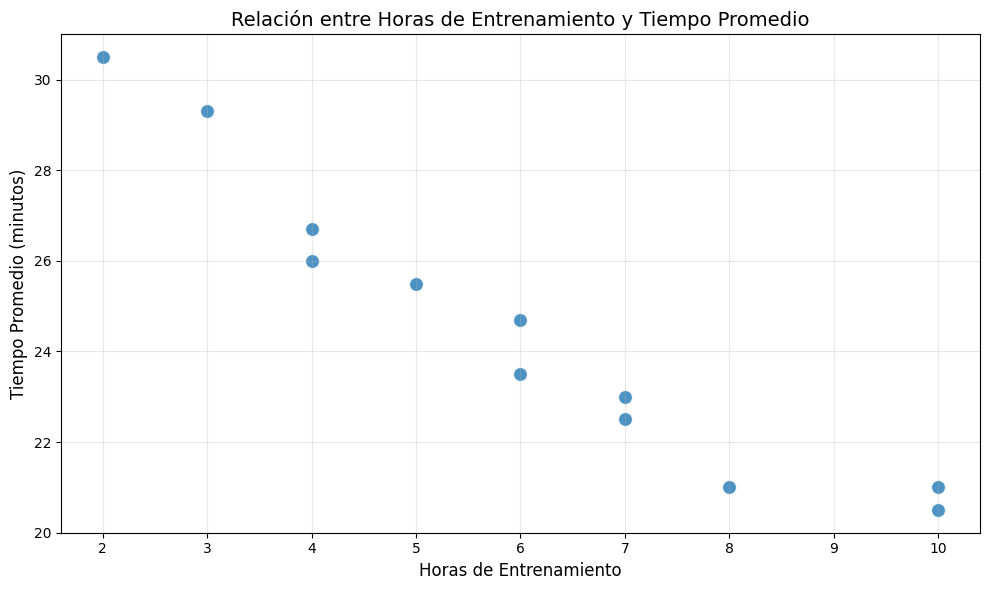

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='HorasEntrenamiento',
    y='TiempoPromedio_min',
    s=100,
    alpha=0.8
)
plt.xlabel('Horas de Entrenamiento', fontsize=12)
plt.ylabel('Tiempo Promedio (minutos)', fontsize=12)
plt.title('Relación entre Horas de Entrenamiento y Tiempo Promedio', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Ecuacionb del error cuadratico medio con descenso de gradiente
MSE =  (1/n) × Σ(yi - ŷi)²
Donde:
- n = numero total de observaciones. En este caso: 11.
- yi = valor real observado.
- yi^ = valor predicho por el modelo.
- yi^ = w0 + w1 x xi -> donde w1 es el peso que acompana a x1 y w0 es el bias(coeficiente 1).

Habria que sacar las derivadas parciales del MSE en cada epoch, e ir restando en cada epoch al peso, el learning rate por la derivada parcial.
 

### Error para descenso de gradiente estoacastico(SGD) y ventaja

En SGD se minimiza la misma perdida pero evaluada por muestra. La perdida estocastica por ejemplo de es: 1/2. (wxi + b - yi) ^ 2, y los pasos de actualizacion usan unicamente es ejemplo(o un minilote) en lugar de todo el conjuynto. 

Ventaja principak: Cada actualizacion es mucho mas barata( O(1) por paso en lugar de O(n)), lo que suele dar convergencia mas rapida en tiempo de pared en conjuntos grandes; ademas, el "ruido" estocastico puede ayudar a salir de mesetas/valles pocos pronunciados

In [76]:
def mean_gradient_descent(X,y, learning_rate=0.01, epochs=100 ):
    bias = np.random.normal(0,0.1) ## Intercepto
    w0 = np.random.normal(0, 0.1) ## Weight de Horas entrenamiento
    n = len(X)
    costs = []
    bias_history = [bias]
    w0_history = [w0]
    print(f"Iniciando descenso de gradiente con {epochs} epochs")
    print(f"Learning rate: {learning_rate}")
    print(f"Parámetros iniciales: w0={w0:.4f}, bias={bias:.4f}")
    print("-" * 50)
    for epoch in range(epochs):
        y_pred = bias + w0 * X
        # Calcular error
        error = y - y_pred
        #Calcular MSE
        mse = np.mean(error ** 2)
        costs.append(mse)

        #Calcular gradientes
        grad_bias =  -(2/n) * np.sum(error)
        grad_w0 = -(2/n) * np.sum(X * error)

        bias = bias - learning_rate * grad_bias
        w0 = w0 - learning_rate * grad_w0

        w0_history.append(w0)
        bias_history.append(bias)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d}: MSE={mse:.6f}, bias={bias:.4f}, w0={w0:.4f}")

    return w0, bias, costs, w0_history, bias_history




        
    
        


In [77]:
X = df['HorasEntrenamiento'].values 
y = df['TiempoPromedio_min'].values 

w0_final, bias_final, costs, w0_history, bias_history = mean_gradient_descent(
    X, y,
    epochs=1000,
    learning_rate=0.01,
    
)

print(f"bias(intercepto): {bias_final}")
print(f"w0 final: {w0_final}")


Iniciando descenso de gradiente con 1000 epochs
Learning rate: 0.01
Parámetros iniciales: w0=0.1620, bias=0.0485
--------------------------------------------------
Epoch  10: MSE=133.808518, bias=1.3598, w0=3.1495
Epoch  20: MSE=126.552924, bias=2.2011, w0=3.0289
Epoch  30: MSE=119.692990, bias=3.0193, w0=2.9116
Epoch  40: MSE=113.207138, bias=3.8148, w0=2.7976
Epoch  50: MSE=107.074970, bias=4.5883, w0=2.6867
Epoch  60: MSE=101.277199, bias=5.3404, w0=2.5789
Epoch  70: MSE=95.795589, bias=6.0717, w0=2.4741
Epoch  80: MSE=90.612900, bias=6.7828, w0=2.3721
Epoch  90: MSE=85.712832, bias=7.4743, w0=2.2730
Epoch 100: MSE=81.079971, bias=8.1466, w0=2.1767
Epoch 110: MSE=76.699749, bias=8.8003, w0=2.0830
Epoch 120: MSE=72.558386, bias=9.4360, w0=1.9918
Epoch 130: MSE=68.642859, bias=10.0541, w0=1.9033
Epoch 140: MSE=64.940851, bias=10.6551, w0=1.8171
Epoch 150: MSE=61.440720, bias=11.2395, w0=1.7333
Epoch 160: MSE=58.131456, bias=11.8077, w0=1.6519
Epoch 170: MSE=55.002652, bias=12.3602, w0

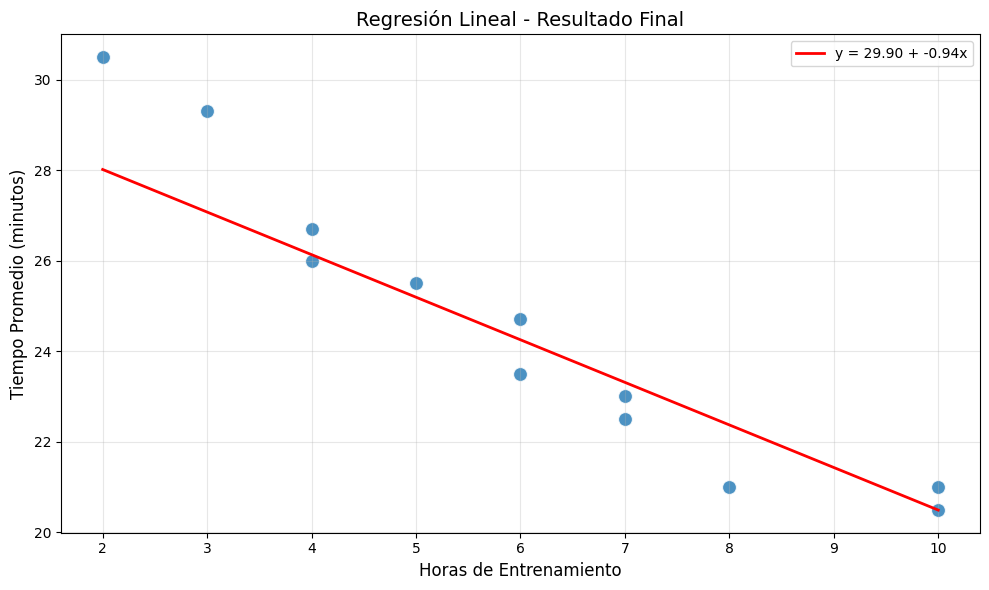

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='HorasEntrenamiento',
    y='TiempoPromedio_min',
    s=100,
    alpha=0.8
)

x_line = np.linspace(df['HorasEntrenamiento'].min(), df['HorasEntrenamiento'].max(), 100)
y_line = w0_final * x_line + bias_final
plt.plot(x_line, y_line, 'r-', linewidth=2, 
         label=f'y = {bias_final:.2f} + {w0_final:.2f}x')

plt.xlabel('Horas de Entrenamiento', fontsize=12)
plt.ylabel('Tiempo Promedio (minutos)', fontsize=12)
plt.title('Regresión Lineal - Resultado Final', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [79]:
def pure_sgd(X, y, learning_rate=0.01, epochs=100):
    """
    SGD puro: actualiza parámetros con cada dato individual
    """
    w0 = np.random.normal(0, 0.1)  # Intercepto
    w1 = np.random.normal(0, 0.1)  # Peso
    n = len(X)
    costs = []
    w0_history = [w0]
    w1_history = [w1]
    
    print(f"Iniciando SGD puro con {epochs} epochs")
    print(f"Learning rate: {learning_rate}")
    print(f"Parámetros iniciales: w0={w0:.4f}, w1={w1:.4f}")
    print("-" * 50)
    
    for epoch in range(epochs):
        # Mezclar los datos en cada epoch
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        
        # Procesar cada dato individualmente
        for i in range(n):
            # Tomar un solo dato
            x_i = X_shuffled[i]
            y_i = y_shuffled[i]
            
            # Predicción para este dato
            y_pred = w0 + w1 * x_i
            
            # Error para este dato
            error = y_i - y_pred
            
            # MSE para este dato (solo para tracking)
            mse_i = error ** 2
            epoch_cost += mse_i
            
            # Calcular gradientes para este dato
            grad_w0 = -2 * error
            grad_w1 = -2 * x_i * error
            
            # Actualizar parámetros inmediatamente
            w0 = w0 - learning_rate * grad_w0
            w1 = w1 - learning_rate * grad_w1
        
        # Costo promedio del epoch
        avg_cost = epoch_cost / n
        costs.append(avg_cost)
        w0_history.append(w0)
        w1_history.append(w1)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d}: MSE={avg_cost:.6f}, w0={w0:.4f}, w1={w1:.4f}")
    
    return w0, w1, costs, w0_history, w1_history

In [81]:
# Preparar datos
X = df['HorasEntrenamiento'].values
y = df['TiempoPromedio_min'].values

# Ejecutar SGD puro
w0_sgd, w1_sgd, costs_sgd, w0_hist_sgd, w1_hist_sgd = pure_sgd(X, y, learning_rate=0.01, epochs=50)

timepo_9_horas = w0_sgd + 9 * w1_sgd
timepo_9_horas

Iniciando SGD puro con 50 epochs
Learning rate: 0.01
Parámetros iniciales: w0=0.0040, w1=0.0041
--------------------------------------------------
Epoch  10: MSE=144.186849, w0=10.5519, w1=2.0427
Epoch  20: MSE=77.981876, w0=16.9090, w1=1.1515
Epoch  30: MSE=29.721105, w0=20.9409, w1=0.2227
Epoch  40: MSE=14.354834, w0=24.2239, w1=-0.1693
Epoch  50: MSE=7.105069, w0=26.5222, w1=-0.5032


np.float64(21.993651630191877)